# mix-proj

# Yue Zhao

In [2]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from scipy import stats
import math
plt.style.use('seaborn')

## GMM and EM algorithm

### 1D mixture modelling and EM algorithm

In [3]:
data = pd.read_csv("http://www.rob-mcculloch.org/data/calhouse.csv")
longitude = np.array(data["longitude"])
latitude = np.array(data["latitude"])

#### First look at the data

define pdf function

In [4]:
def pdf(data, mean: float, variance: float):
    # A normal continuous random variable.
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(data - mean)/(2*variance)))
    return s1 * s2

##### longitude visualization

<function matplotlib.pyplot.show(close=None, block=None)>

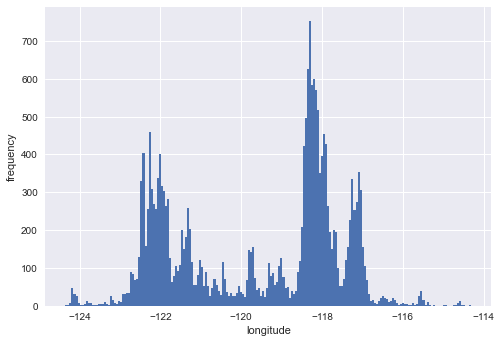

In [5]:
plt.hist(longitude, bins=200)
plt.xlabel("longitude")
plt.ylabel("frequency")
plt.show

[]

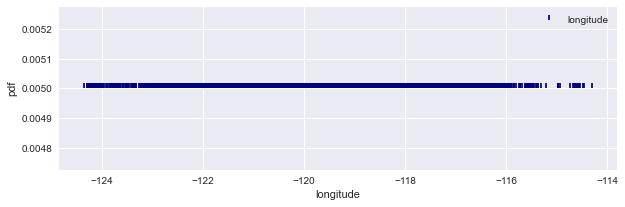

In [6]:
bins = np.linspace(np.min(longitude),np.max(longitude),100)

plt.figure(figsize=(10,3))
plt.xlabel("longitude")
plt.ylabel("pdf")
plt.scatter(longitude, [0.005] * len(longitude), color='navy', s=30, marker=2, label="longitude")

plt.legend()
plt.plot()

##### latitude visualization

<function matplotlib.pyplot.show(close=None, block=None)>

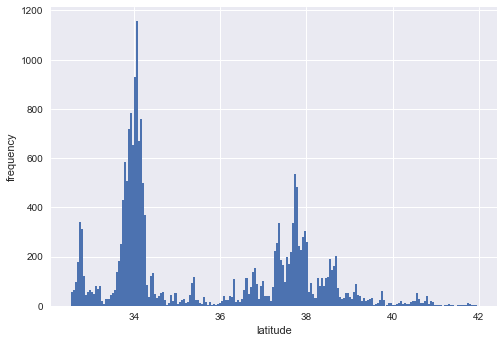

In [12]:
plt.hist(latitude, bins=200)
plt.xlabel("latitude")
plt.ylabel("frequency")
plt.show

[]

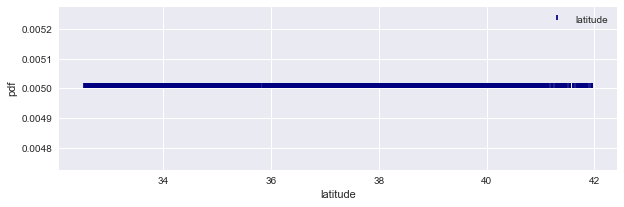

In [13]:
bins = np.linspace(np.min(latitude),np.max(latitude),100)

plt.figure(figsize=(10,3))
plt.xlabel("latitude")
plt.ylabel("pdf")
plt.scatter(latitude, [0.005] * len(latitude), color='navy', s=30, marker=2, label="latitude")

plt.legend()
plt.plot()

#### 1D GMM and EM algorithm

##### longitude 1D GMM

In [7]:
# define the number of clusters to be learned
k = 2
longitude_weights = np.ones((k)) / k
longitude_means = np.random.choice(longitude, k)
longitude_variances = np.random.random_sample(size=k)
print(longitude_means, longitude_variances)

[-122.3  -122.55] [0.76682857 0.76871831]


<Figure size 576x396 with 0 Axes>

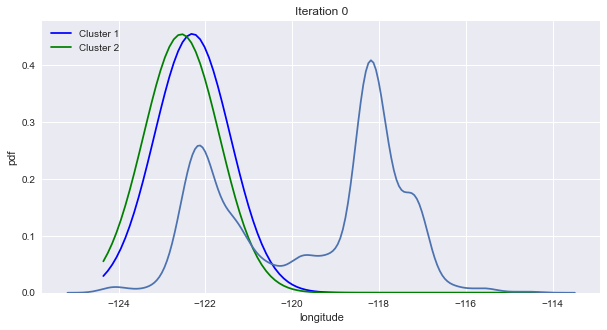

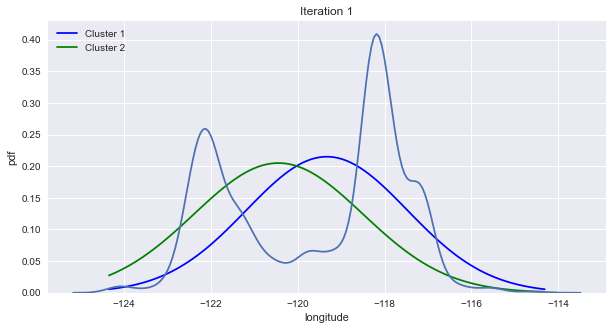

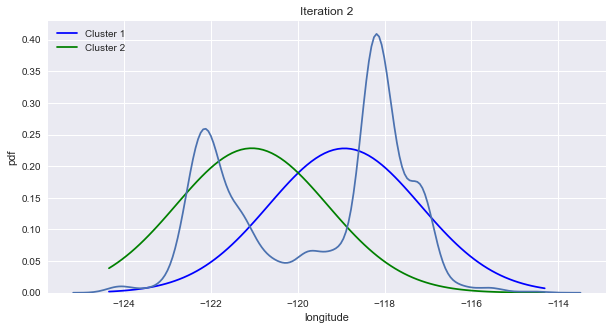

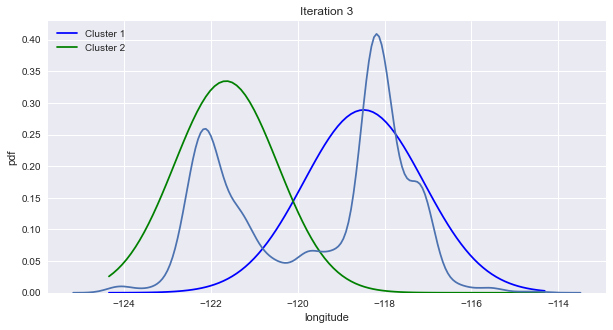

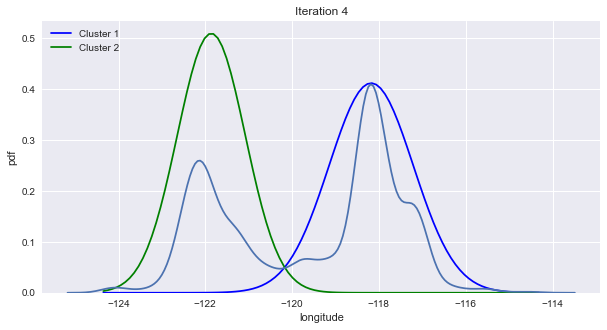

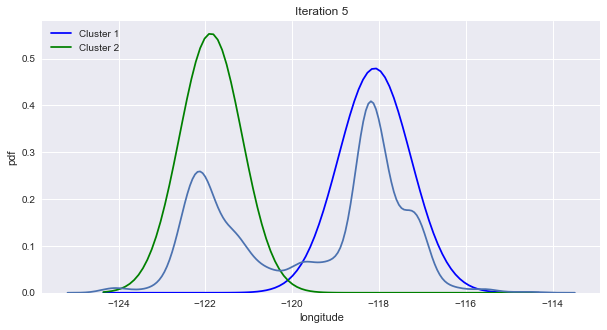

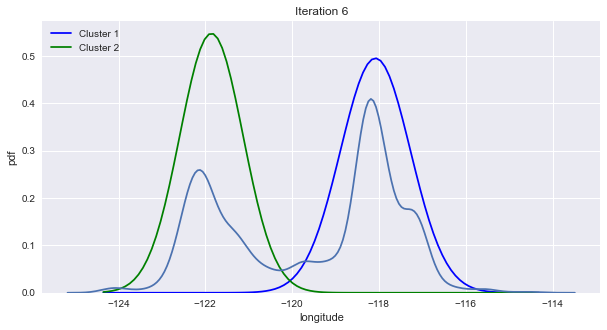

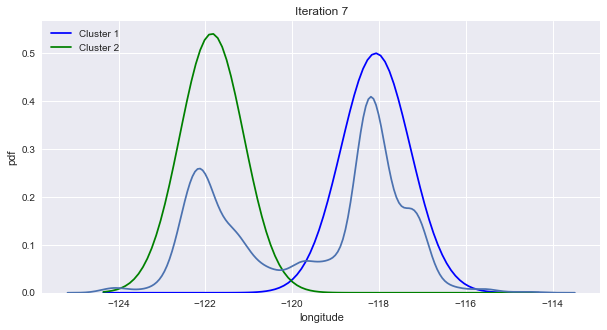

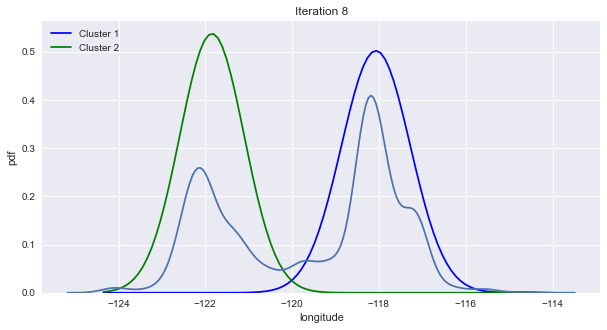

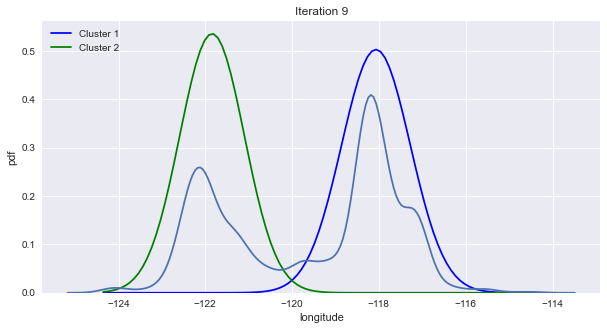

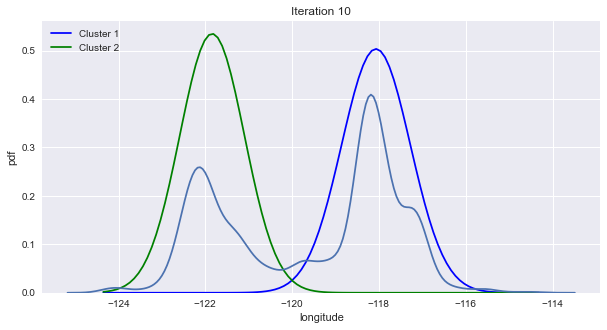

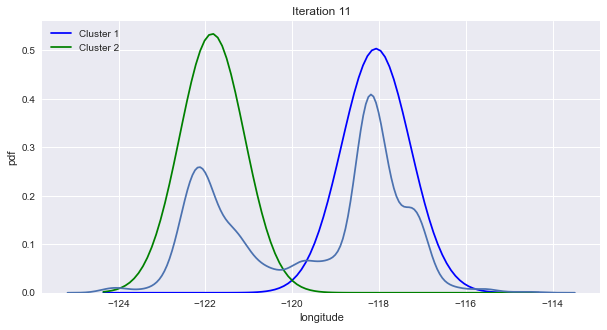

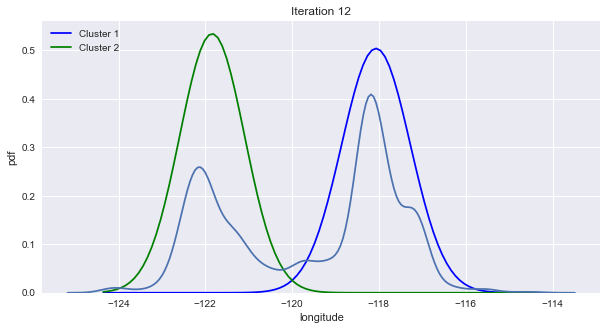

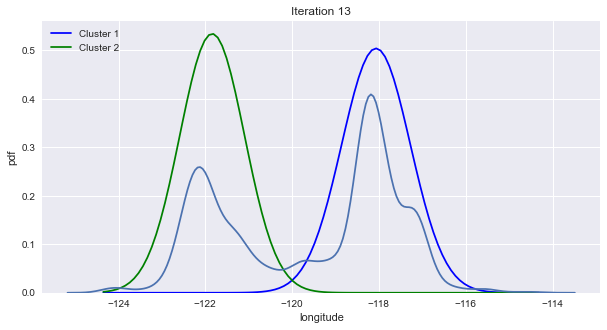

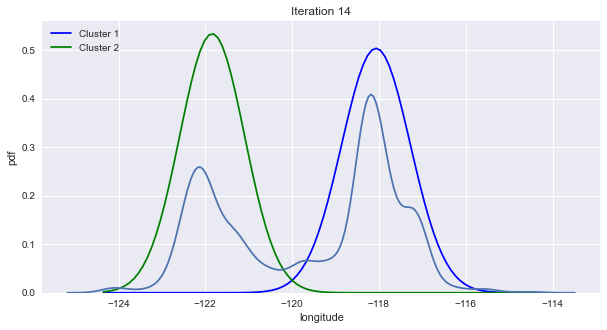

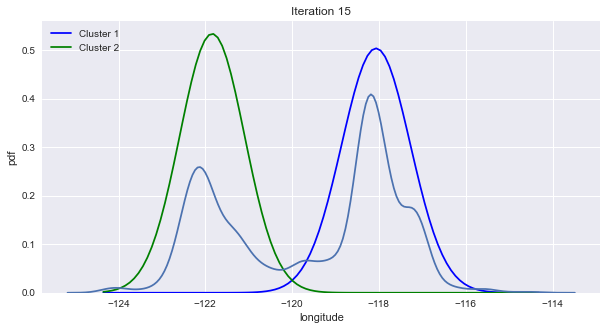

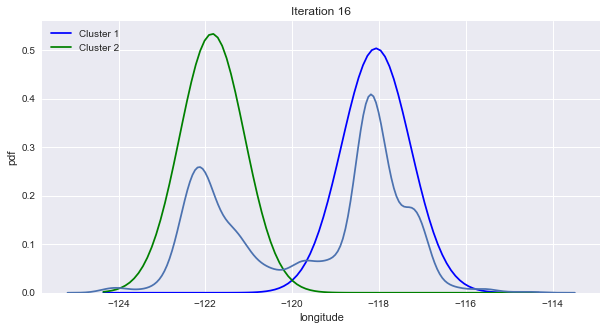

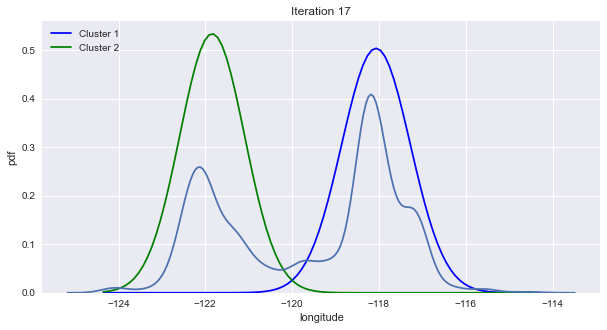

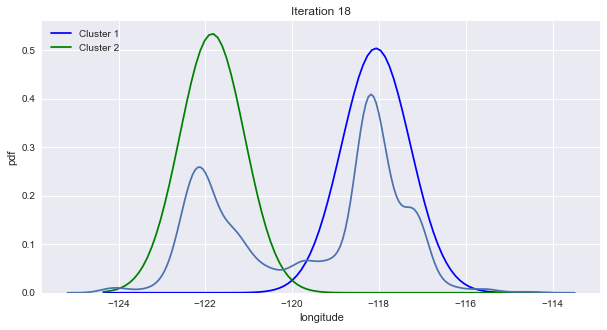

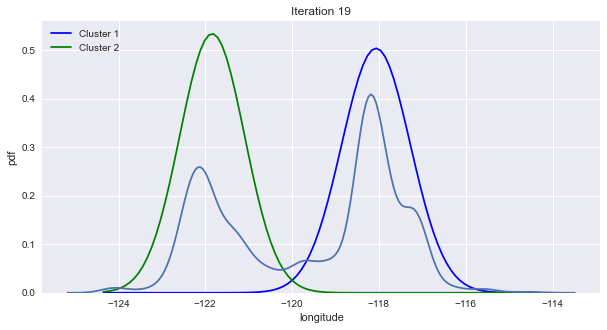

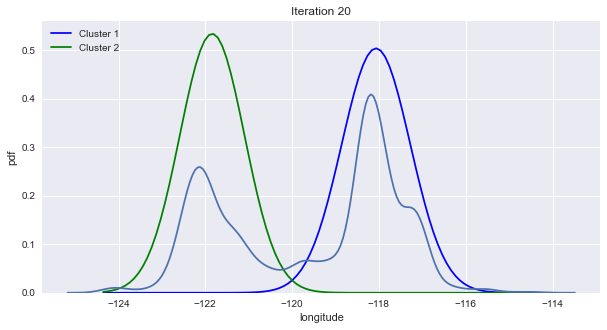

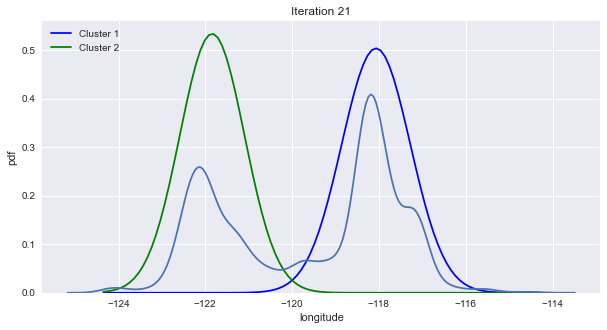

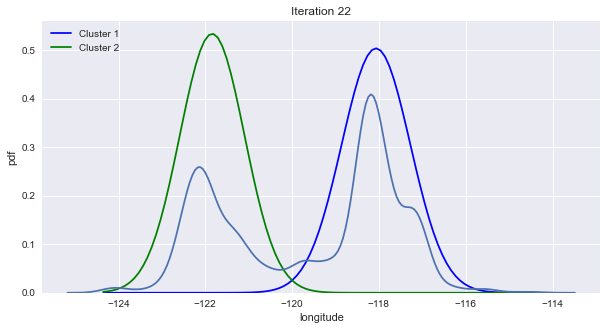

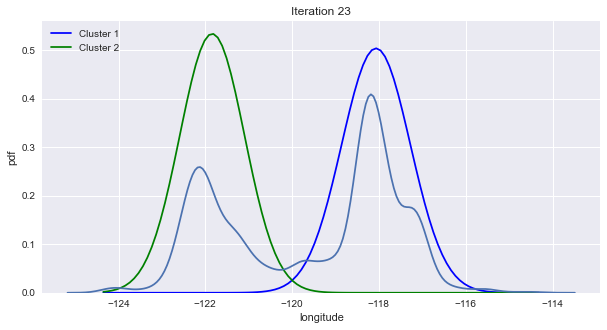

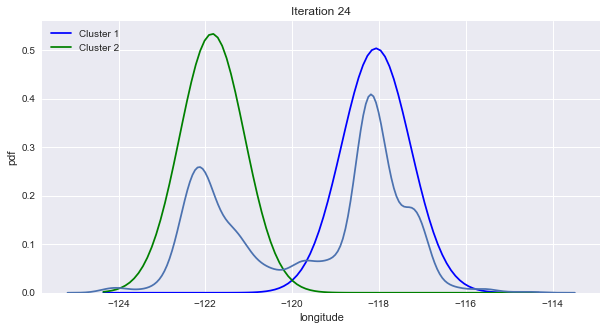

In [8]:
eps=1e-8
plt.figure()
for step in range(25):
  
    if step % 1 == 0:
        plt.figure(figsize=(10,5))
        axes = plt.gca()
        plt.xlabel("longitude")
        plt.ylabel("pdf")
        plt.title("Iteration {}".format(step))

        plt.plot(bins, pdf(bins, longitude_means[0], longitude_variances[0]), color='blue', label="Cluster 1")
        plt.plot(bins, pdf(bins, longitude_means[1], longitude_variances[1]), color='green', label="Cluster 2")
        sns.kdeplot(data=longitude)
        plt.legend(loc='upper left')
    
        #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
        plt.show()
  
    # calculate the maximum likelihood of each observation xi
    likelihood = []
  
    # E step
    for j in range(k):
        likelihood.append(pdf(longitude, longitude_means[j], np.sqrt(longitude_variances[j])))
    likelihood = np.array(likelihood)
    
    b = []
    # M step 
    for j in range(k):
        
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generanted by each gaussian    
        b.append((likelihood[j] * longitude_weights[j]) / (np.sum([likelihood[i] * longitude_weights[i] for i in range(k)], axis=0)+eps))
  
        # updage mean and variance
        longitude_means[j] = np.sum(b[j] * longitude) / (np.sum(b[j]+eps))
        longitude_variances[j] = np.sum(b[j] * np.square(longitude - longitude_means[j])) / (np.sum(b[j]+eps))
    
        # update the weights
        longitude_weights[j] = np.mean(b[j])

In [9]:
longitude_means

array([-118.06738742, -121.84256838])

In [10]:
longitude_variances

array([0.62666746, 0.55809504])

In [11]:
longitude_weights

array([0.60205467, 0.39794513])

##### latitude 1D GMM

[33.98 38.47] [0.2367667  0.82311949]


<Figure size 576x396 with 0 Axes>

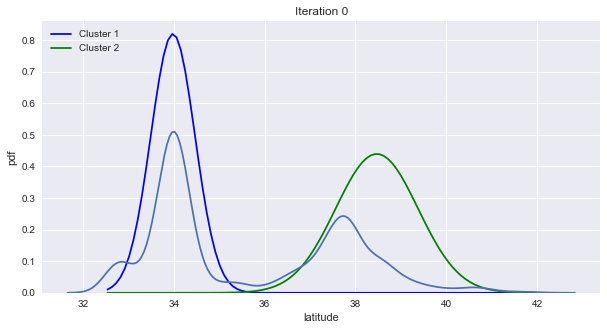

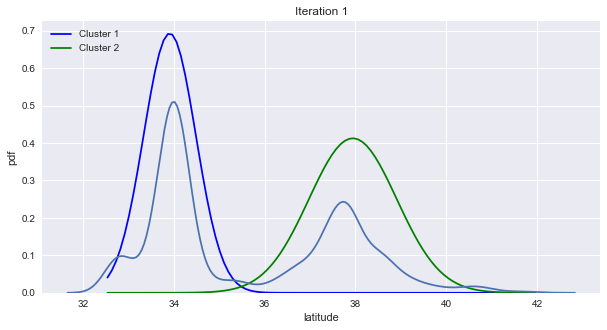

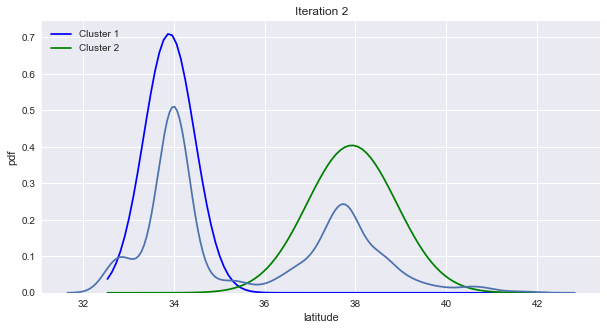

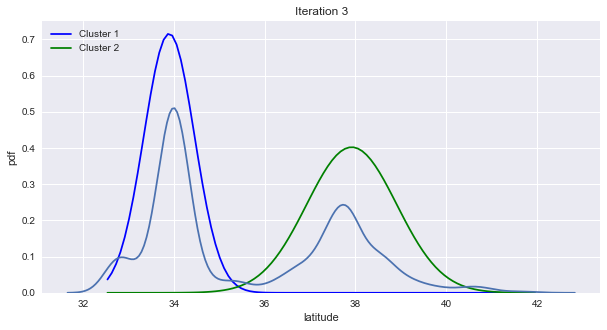

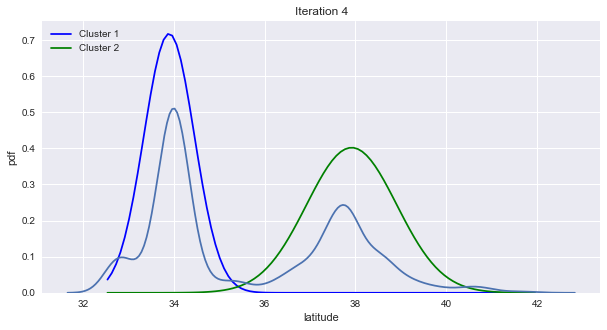

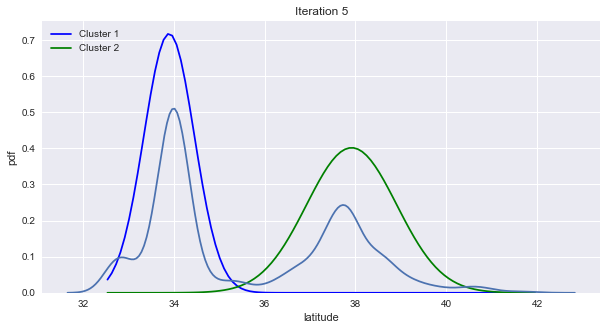

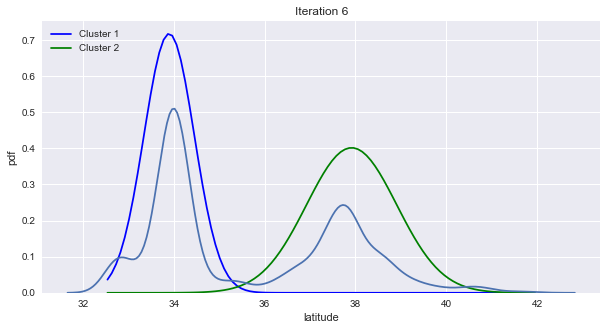

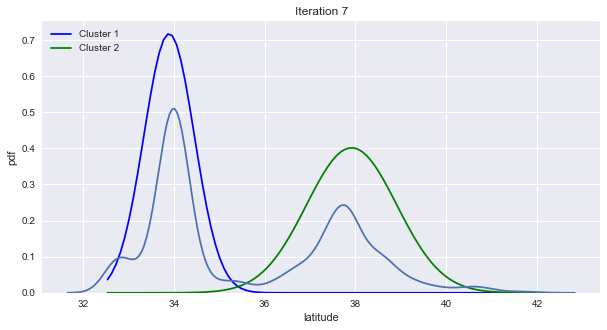

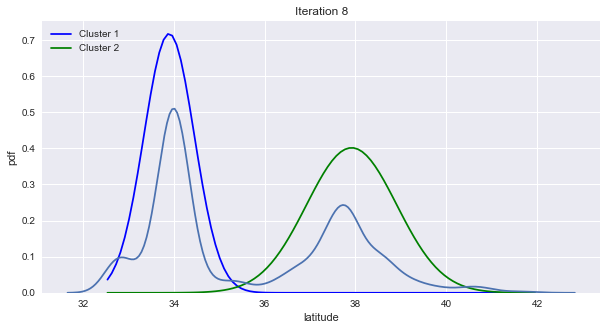

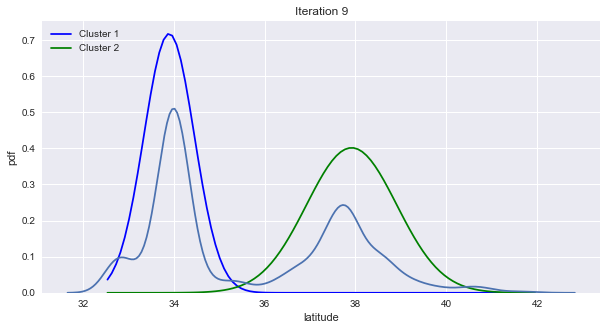

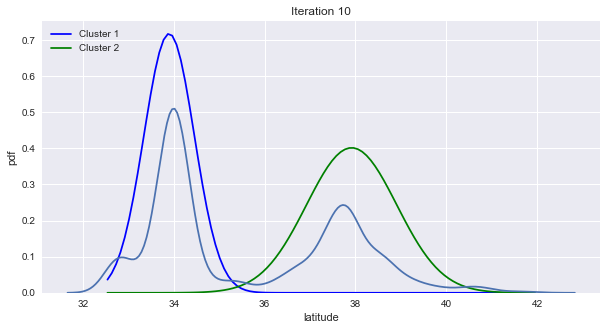

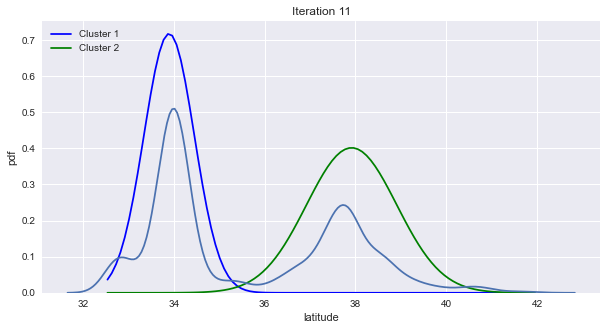

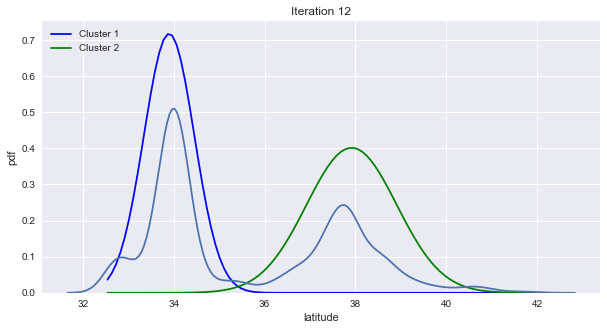

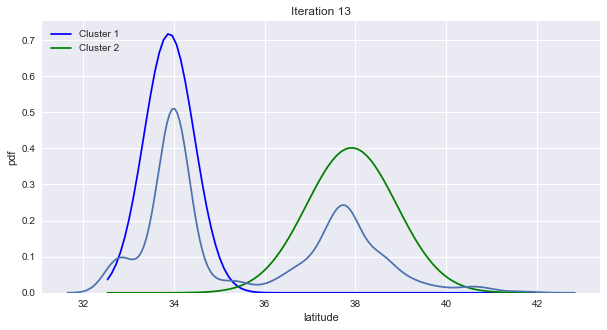

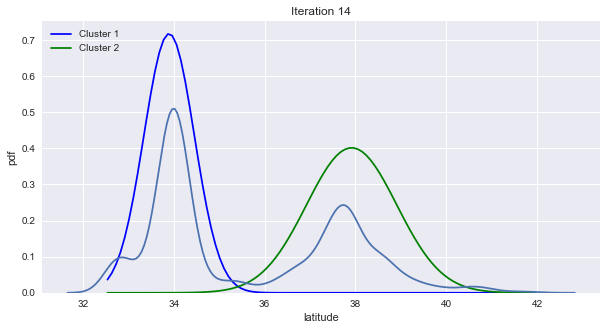

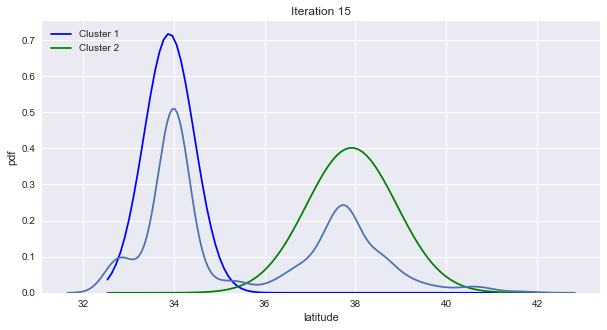

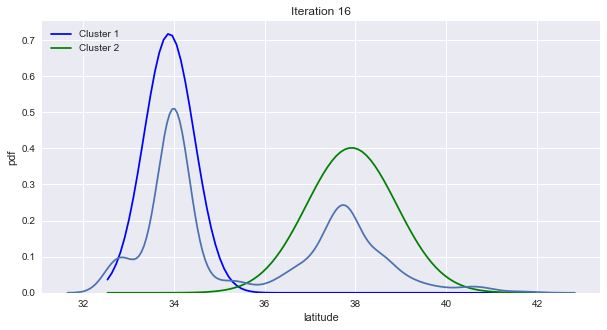

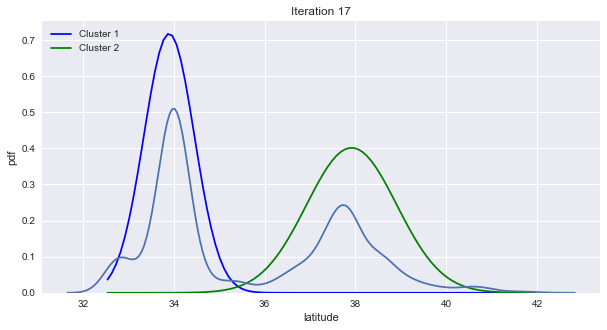

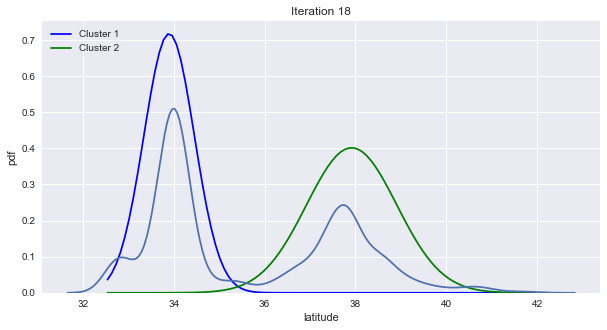

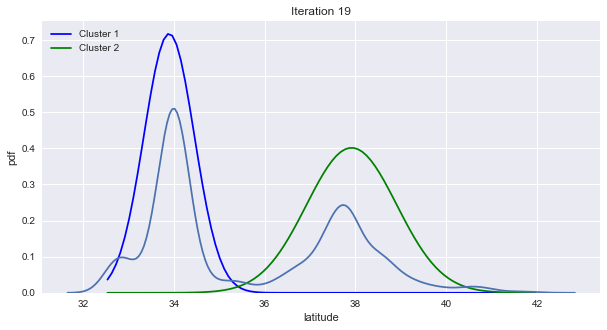

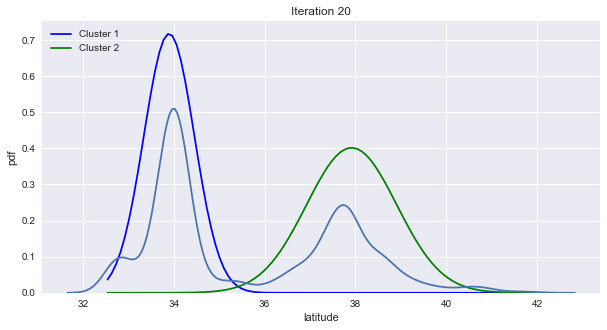

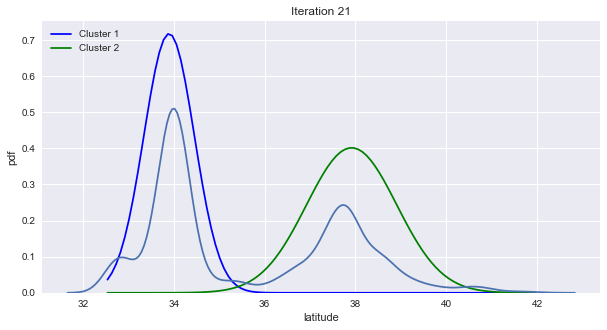

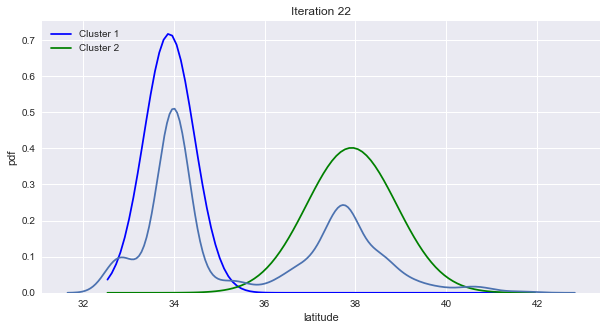

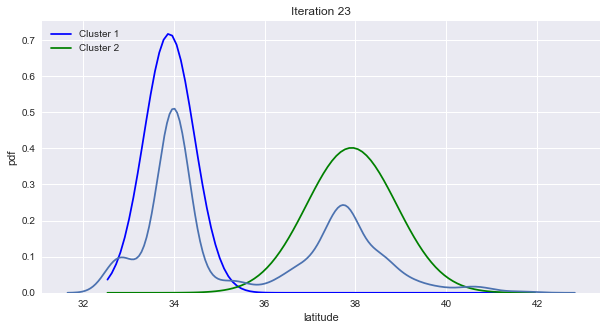

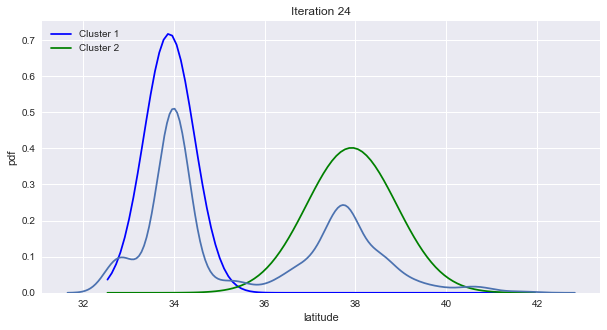

In [14]:
# define the number of clusters to be learned
k = 2
latitude_weights = np.ones((k)) / k
latitude_means = np.random.choice(latitude, k)
latitude_variances = np.random.random_sample(size=k)
print(latitude_means, latitude_variances)

eps=1e-8
plt.figure()
for step in range(25):
  
    if step % 1 == 0:
        plt.figure(figsize=(10,5))
        axes = plt.gca()
        plt.xlabel("latitude")
        plt.ylabel("pdf")
        plt.title("Iteration {}".format(step))

        plt.plot(bins, pdf(bins, latitude_means[0], latitude_variances[0]), color='blue', label="Cluster 1")
        plt.plot(bins, pdf(bins, latitude_means[1], latitude_variances[1]), color='green', label="Cluster 2")
        sns.kdeplot(data=latitude)
        plt.legend(loc='upper left')
    
        #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
        plt.show()
  
    # calculate the maximum likelihood of each observation xi
    likelihood = []
  
    # E step
    for j in range(k):
        likelihood.append(pdf(latitude, latitude_means[j], np.sqrt(latitude_variances[j])))
    likelihood = np.array(likelihood)
    
    b = []
    # M step 
    for j in range(k):
        
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generanted by each gaussian    
        b.append((likelihood[j] * latitude_weights[j]) / (np.sum([likelihood[i] * latitude_weights[i] for i in range(k)], axis=0)+eps))
  
        # updage mean and variance
        latitude_means[j] = np.sum(b[j] * latitude) / (np.sum(b[j]+eps))
        latitude_variances[j] = np.sum(b[j] * np.square(latitude - latitude_means[j])) / (np.sum(b[j]+eps))
    
        # update the weights
        latitude_weights[j] = np.mean(b[j])

In [15]:
latitude_means

array([33.89702206, 37.9146538 ])

In [16]:
latitude_variances

array([0.3090631 , 0.98696638])

In [17]:
latitude_weights

array([0.56819393, 0.43180573])

## 2D mixture modelling and EM algorithm with 100 iterations

### define pdf function

In [ ]:
def pdf(data, mean: float, variance: float):
    # A normal continuous random variable.
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(data - mean)/(2*variance)))
    return s1 * s2

### Define PDF function

In [13]:
def get_pdf(sample, mu, sigma):
    res = stats.multivariate_normal(mu, sigma).pdf(sample)
    return res

### Define log likelihood function

In [22]:
def log_likelihood(data, k, mu, sigma, gama):
    res = 0.0
    for i in range(len(data)):
        cur = 0.0
        for j in range(len(k)):
            cur += gama[j][i] * get_pdf(data[i], mu[j], sigma[j])
        res += math.log(cur)
    return res

### Define EM function

In [24]:
def em(data, k, mu, sigma, steps=100):
    # Number of Gaussian Distribution
    num_gau = len(k)

    # The number of data
    num_data = data.shape[0]

    # Gama [j][I] represents the probability that the ith sample point comes from the JTH Gaussian model
    gama = np.zeros((num_gau, num_data))

    # Record the log-likelihood value for each iteration
    likelihood_record = []
    for step in range(steps):

        # Calculate the Gama matrix
        for i in range(num_gau):
            for j in range(num_data):
                gama[i][j] = k[i] * get_pdf(data[j], mu[i], sigma[i]) / \
                             sum([k[t] * get_pdf(data[j], mu[t], sigma[t]) for t in range(num_gau)])
        cur_likelihood = log_likelihood(data, k, mu, sigma, gama)  # Calculates the current log-likelihood
        likelihood_record.append(cur_likelihood)

        # Update the mu
        for i in range(num_gau):
            mu[i] = np.dot(gama[i], data) / np.sum(gama[i])

        # Update the sigma
        for i in range(num_gau):
            cov = [np.dot((data[t] - mu[i]).reshape(-1, 1), (data[t] - mu[i]).reshape(1, -1)) for t in range(num_data)]
            cov_sum = np.zeros((2, 2))
            for j in range(num_data):
                cov_sum += gama[i][j] * cov[j]
            sigma[i] = cov_sum / np.sum(gama[i])

        # Update the k
        for i in range(num_gau):
            k[i] = np.sum(gama[i]) / num_data
        print('step: {}\tlikelihood:{}'.format(step + 1, cur_likelihood))

    return k, mu, sigma, gama, likelihood_record

### Run EM algorithm for 2D GMM parameter estimation

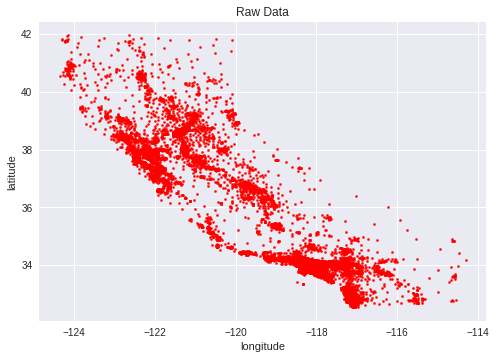

step: 1	likelihood:-52513.03639437327
step: 2	likelihood:-44074.93050813115
step: 3	likelihood:-43242.14021810196
step: 4	likelihood:-42896.77865028298
step: 5	likelihood:-42811.26855878501
step: 6	likelihood:-42795.767530874924
step: 7	likelihood:-42790.87581619058
step: 8	likelihood:-42787.173227513296
step: 9	likelihood:-42780.91914579408
step: 10	likelihood:-42772.31051760532
step: 11	likelihood:-42764.25660012713
step: 12	likelihood:-42758.26949828748
step: 13	likelihood:-42754.23763387566
step: 14	likelihood:-42751.622800475925
step: 15	likelihood:-42749.95097725828
step: 16	likelihood:-42748.885700116996
step: 17	likelihood:-42748.204973630454
step: 18	likelihood:-42747.76743582206
step: 19	likelihood:-42747.48436652286
step: 20	likelihood:-42747.300140102816
step: 21	likelihood:-42747.17965866706
step: 22	likelihood:-42747.10057267664
step: 23	likelihood:-42747.048518324
step: 24	likelihood:-42747.01419014793
step: 25	likelihood:-42746.991521484815
step: 26	likelihood:-42746.97

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


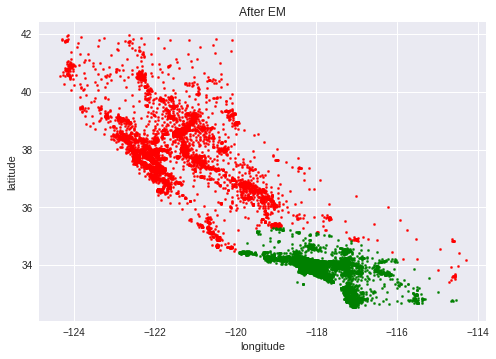

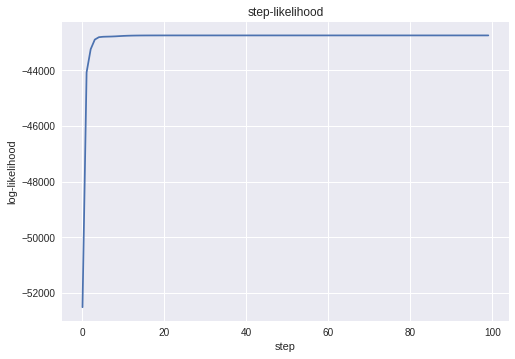

result:
k: [0.4596379526967196, 0.5403620473032804]
mu: [array([-121.49936234,   37.74430448]), array([-117.92831605,   33.83499395])]
sigma: [array([[ 1.37044727, -0.81963015],
       [-0.81963015,  1.39304297]]), array([[ 0.40105933, -0.20872926],
       [-0.20872926,  0.23316952]])]


In [26]:
def main():
    csv_data = pd.read_csv("http://www.rob-mcculloch.org/data/calhouse.csv")
    csv_data = csv_data[["longitude","latitude"]]
    csv_data = np.array(csv_data)

    # Scatter plot of raw data
    plt.scatter(csv_data[:, 0], csv_data[:, 1], s=5, c='r')
    plt.title('Raw Data')
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.show()

    # Initial value of GMM parameter
    k_init = [0.5,0.5]
    mu_init = [[-122, 38],
          [-118, 34]]
    sigma_init = [[[1, 0.5], [0.5, 1]],
            [[0.5, 0], [0, 0.5]]]

    k_res, mu_res, sigma_res, gama, likelihood_record = em(csv_data, k_init, mu_init, sigma_init, steps=100)  # EM algorithm

    # According to the results of EM algorithm draw classification diagram
    # The single Gaussian model to which each sample point belongs is calculated
    classify = gama.argmax(axis=0)
    # The data set is divided into two parts, each belonging to a single Gaussian model
    two_gau = [[], []]
    for i in range(len(classify)):
        two_gau[classify[i]].append(csv_data[i])
    
    # Let's convert it to numpy for a scatter plot
    two_gau = np.array(two_gau)
    for i in range(len(two_gau)):
        two_gau[i] = np.array(two_gau[i])
    colors = ['r', 'g', 'k', 'b']
    for i in range(len(k_res)):
        plt.scatter(two_gau[i][:, 0], two_gau[i][:, 1], s=5, c=colors[i])
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.title('After EM')
    plt.show()

    # Draw a graph of the likelihood change
    plt.plot([n for n in range(len(likelihood_record))], likelihood_record)
    plt.title('step-likelihood')
    plt.xlabel('step')
    plt.ylabel('log-likelihood')
    plt.show()
    print('result:\nk: {}\nmu: {}\nsigma: {}'.format(k_res, mu_res, sigma_res))


if __name__ == '__main__':
    main()

# GMM and Gibbs sampler with 100 iterations

## Define GMM gibbs sampler function

In [44]:
class GMMGibbsSampler():
    
    #initializes the Gibbs sampler with some standard parameters
    def __init__(self, X, Y, sigma=1, lam=1, burn_in=100, lag=10):
        #lag is the number of iterations between samples once we have reached the stationary distribution
        #X is a set of 2d random variables
        #Y is cluster assignments.It is the randomly generated labels for the variables
        #sigma is one of the model parameter
        #lam is one of the model parameter
        
        # Add the variables to the class
        self.X = X 
        self.Y = Y 
        self.burn_in = burn_in
        self.lag = lag
        self.sigma = 1.0
        self.lam = 1.0
        self.num_mixtures = self.Y.max() + 1
        print(self.num_mixtures)

        self.u_locations = np.zeros((self.num_mixtures, X.shape[1]))
        self.pi_ks = np.ones(self.num_mixtures)/ float(self.num_mixtures)
        
        # Constant variable
        self._normalizer = (1 / ((self.sigma ** 2) * np.sqrt(2 * np.pi)))
        
        # iter_prob is a list holding the total probability in each iteration
        self.iter_prob = [] 
        pass
    
    #Define RunGibbsSampler function.
    #It controls the overall function of the Gibbs sampler and runs the Gibbs sampling.
    def RunGibbsSampler(self, iterations=False):
        #iterations is the number of iterations to run if the time specified in the burn_in parameter is not given
        
        if not iterations:
            num_iters = self.burn_in
        else:
            num_iters = iterations

        #Plot the initial distribution
        self.PointsUlocationsPlot("initial distribution")

        #Run for a given number of iterations
        for i in range(num_iters):
            self.CalLogLikelihood()
            self.SampleMixtureLocations()
            self.SampleClusterAllocations()

        #Plot the final mixture distribution
        self.PointsUlocationsPlot("final mixture distribution")
        
        #Plot the log likelihood function in the final iteration
        self.LogLikelihoodPlot()

        return self.u_locations, self.Y
    
    #Define SampleMixtureLocations function taking samples from the mixed locations and updates them
    def SampleMixtureLocations(self):
        
        for i in range(0,self.num_mixtures):
            
            #Distribution of indicators
            assigned_indices = (self.Y == i)
            zeta = assigned_indices.sum()

            # used x and create the xbar
            class_x = self.X[assigned_indices, :]
            x_bar = np.sum(class_x, axis=0)
            u_bar = x_bar / float(zeta)

            # Cate the hat distributions
            lambda_hat = ((zeta/(self.sigma ** 2)) + (1/self.lam ** 2)) ** -1
            u_hat = ((zeta / (self.sigma ** 2)) * lambda_hat) * u_bar

            #Sampling this mixed location, which assumes non-covariance which is just a simple standard distribution
            for n in range(0, self.X.shape[1]):
                self.u_locations[i,n] = np.random.normal(u_hat[n], lambda_hat)

        pass    

    #Define SampleClusterAllocations function
    #Sampling the cluster allocation for a given mixed location
    def SampleClusterAllocations(self):     
        
        for i in range(0,self.X.shape[0]):
            # Sampling the cluster allocation
            self.SampleClusterAllocation(i)

        pass

    #Define SampleClusterAllocation function which performs a sample assignment
    def SampleClusterAllocation(self, i):
        #i is the assignment index for the sample
        probs = np.zeros(self.num_mixtures)
        for k in range(0, self.num_mixtures):
            d = np.linalg.norm(self.X[i, :] - self.u_locations[k, :])
            probs[k] = np.exp(-(d ** 2) / (2 * (self.sigma ** 2))) * self._normalizer

        #Normalized probability
        norm_probs = probs / float(sum(probs))

        # Creates a list variable that stores each value as 1
        #It uses a unified random number generator to sample from the cluster allocation
        samp_divs = [norm_probs[0], sum(norm_probs[0:2])]
        rand_num = np.random.rand(1)
        
        #Get cluster allocation
        cluster_assign = False
        for k in range(0,self.num_mixtures - 1):
            if rand_num < samp_divs[k]:
                cluster_assign = k
                break
                
        #If it is larger than all of our sample div
        #We assign the last mixed value to our variable
        if cluster_assign is False:
            cluster_assign = self.num_mixtures - 1

        self.Y[i] = cluster_assign
        pass

    #Define CalLogLikelihood function.
    #This function computes the total log likelihood of a given function value, 
    #and the log likelihood data point and the Gaussian mean are assigned to the current classification
    def CalLogLikelihood(self):

        log_probs = np.zeros(self.X.shape[0])
        for i in range(0, self.X.shape[0]):
            # Calculate the sum of the log likelihood
            clust = self.Y[i]
            d = np.linalg.norm(self.X[i, :] - self.u_locations[clust, :])
            log_probs[i] =  np.log(np.exp(-(d ** 2) / (2 * (self.sigma ** 2))) * self._normalizer)
        self.iter_prob.append(log_probs.sum())
        
        pass
    
    #Plot the final log likelihood of the function
    #This function plots the log likelihood as the function that completes the iteration
    def LogLikelihoodPlot(self):

        fig, ax = plt.subplots()
        iteration_vec = range(0, len(self.iter_prob))
        ax.plot(iteration_vec, self.iter_prob)
        ax.set_title('Log Likelihood vs. Iterations')

        plt.show()
        pass
    
    #Plot the points and the u_locations in a scatter plot
    def PointsUlocationsPlot(self, title):
        
        fig, ax = plt.subplots()
        datasets = []

        for i in range(self.num_mixtures):
            #Distribution of indicators
            assigned_indices = (self.Y == i)
            datasets.append(self.X[assigned_indices, :])

        #Put the scatter diagram on the scene.
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        for j,data in enumerate(datasets):
            ax.scatter(data[:, 0], data[:, 1], color=colors[j], s = 3)

        ax.set_title(title)

        plt.show()
        pass    

#Endclass

## Initialize the data variables

In [45]:
def InitializeData():
    # All of these will be assumed 2-D data
## Initialize the data variables
    
    #Because we have a large amount of data, it is easy to have problems in the following matrix calculation.
    #To facilitate data processing, variables need to be scaled.
    #It can also compare different variables equally.
    #Scaling only changes the scope of the data.
    X = preprocessing.scale(csv_data)

    #Randomly assign init clusters
    rand_Y = np.random.randint(0, 2, len(X))
    return X, rand_Y

## Run Gibbs sampler for 2D GMM parameter estimation

2


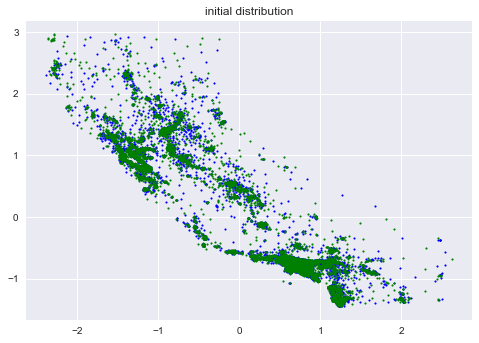

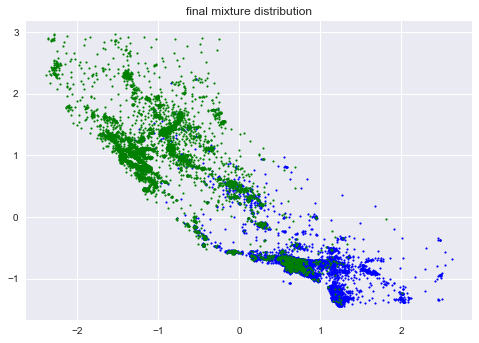

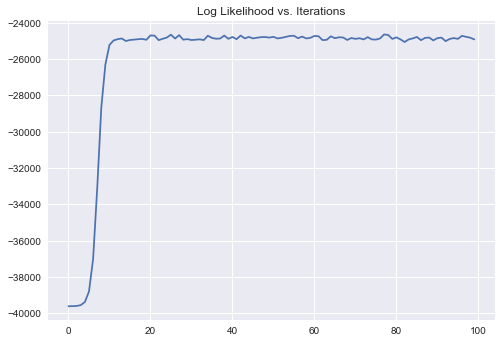

[1 1 1 ... 1 1 1]
[[ 0.73561834 -0.73673703]
 [-0.96532037  0.9667682 ]]


In [46]:
if __name__ == "__main__":
    # Test script for checking my module
    X, Y = InitializeData()
    # Now initalize the gibbs sampler
    gs = GMMGibbsSampler(X, Y)
    gs.RunGibbsSampler()
    print (gs.Y)
    print (gs.u_locations)

In [47]:
gsY = gs.Y
m,n = np.bincount(gsY.flatten())
ProbCluster0 = m/(m+n)
ProbCluster1 = n/(m+n)

In [48]:
ProbCluster0,ProbCluster1

(0.5659399224806202, 0.43406007751937986)

## Compare EM algorithm with Gibbs Sampler

The percentages of the two clusters obtained by EM algorithm after 100 iterations are 0.46 and 0.54.The mean values of the two clusters' Longtitude and latitude are about(-121.49936234, 37.74430448), (-117.92831605, 33.83499395). The calculations took more than an hour, significantly longer than the Gibbs Sampler.

The proportions of the two clusters obtained by Gibbs Sampler after 100 iterations are 0.43 and 0.57.The scaled mean values of the two clustering methods, Longtitude and latitude, are (0.73561834, -0.73673703) and (-0.96532037, 0.9667682), which require inverse scaling to obtain accurate results, which are troublesome in coding.

The log Likelihood of EM converges between -44000 and -42000.The loglikelihood of Gibbs Sampler converges between -26000 and -24000.In this respect, Gibbs Sampler is the better performer.

EM and Gibbs Sampler are two different ways to predict the hidden variables of a statistical model.EM is essentially an algorithm for finding MLE, which is a point estimate.The EM likelihood function for multimodal cannot guarantee the global optimum.EM algorithm is non-convex and can easily fall into local optimum.And the code is slower to run, the computer memory requirements are higher.

Gibbs Sampler is actually the construction of a Markov process, the advantage is simple derivation.It is not about convergence for a particular point in the parameter space θ, but about whether the probability distribution covering θ converges to the true distribution P*(θ).In other words, its convergence is discussed in a space containing all probability distributions over θ, where each point represents a distribution over θ.If the Markov Chain behind Gibbs Sampler is not Ergodic's, there will be a problem.If Ergodicity is satisfied, theoretically it must converge.Gibbs Sampler seems to test data more rigorously, requiring scaling of data in large volumes.